In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.utils import load_img, img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

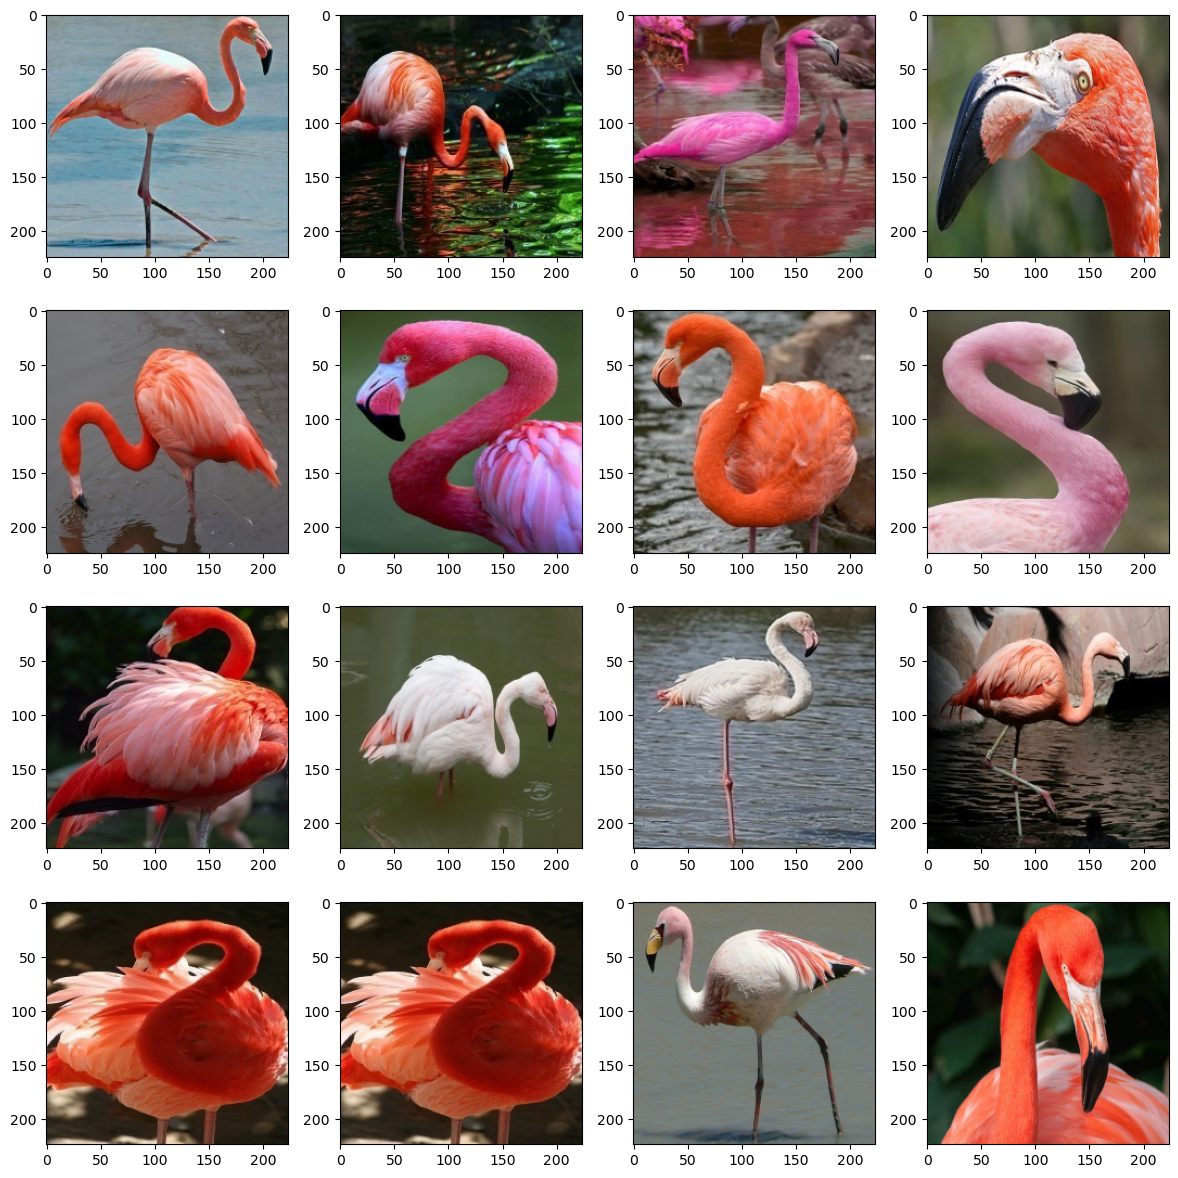

In [2]:
plt.figure(figsize=(12,12))
path = "Bird Speciees Dataset/FLAMINGO"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img =imread(path + "/" + random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)

In [3]:
dir = "Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], [] 

In [4]:
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        image_path = f"{dir}/{directory}/{files}"
        image = cv2.imread(image_path)
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)

In [5]:
label_count = pd.DataFrame(label_list).value_counts()
label_count

0                 
AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
Name: count, dtype: int64

In [6]:
num_classes = len(label_count)

In [7]:
import os

dataset_dir = "Bird Speciees Dataset"
print("Klasördeki dosyalar:", os.listdir(dataset_dir))



Klasördeki dosyalar: ['EMPEROR PENGUIN', 'CARMINE BEE-EATER', 'BARN OWL', 'DOWNY WOODPECKER', 'AMERICAN GOLDFINCH', 'FLAMINGO']


In [8]:
import os
import cv2

dataset_dir = "Bird Speciees Dataset"
image_list = []

for root, dirs, files in os.walk(dataset_dir):   # Also looks in subfolders
    for file in files:
        file_path = os.path.join(root, file)
        img = cv2.imread(file_path)
        if img is not None:
            image_list.append(img)

print("Total Picture: ", len(image_list))
print("Size of first picture: ", image_list[0].shape)


Total Picture:  811
Size of first picture:  (224, 224, 3)


In [9]:
label_list = np.array(label_list)
label_list.shape

(811,)

In [10]:
X_train, X_test, y_train, y_test =train_test_split(image_list,
                                                   label_list,
                                                   test_size= 0.2,
                                                   random_state= 9)

In [11]:
X_train = np.array(X_train, dtype= np.float16)/ 255.0
X_test = np.array(X_test, dtype=np.float16)/255.0

X_train = X_train.reshape(-1,224,224,3)
X_test = X_test.reshape(-1, 224, 224,3)

In [12]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)


['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [13]:
X_train, X_val, y_train, y_val= train_test_split(X_train,
                                                 y_train,
                                                 test_size=0.2,
                                                 random_state=9)

In [14]:
model = Sequential()

model.add(Conv2D(8, (3,3),padding="same", input_shape=(224,224,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(16, (3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(32, activation= "relu"))
model.add(Dense(num_classes, activation= "softmax"))
model.summary()

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,038 (1.29 MB)

 Trainable params: 338,038 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss= "categorical_crossentropy",
              optimizer = Adam(0.0005),
              metrics =["accuracy"])

In [16]:
epoch = 50
batch_size = 128
history = model.fit(X_train,y_train,
                    batch_size =batch_size,
                    epochs= epoch,
                    validation_data = (X_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.1370 - loss: 1.8616 - val_accuracy: 0.1615 - val_loss: 1.8157
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.1544 - loss: 1.8216 - val_accuracy: 0.1462 - val_loss: 1.7909
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.2224 - loss: 1.7810 - val_accuracy: 0.1385 - val_loss: 1.8082
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.1951 - loss: 1.7807 - val_accuracy: 0.1615 - val_loss: 1.7846
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.2249 - loss: 1.7652 - val_accuracy: 0.1846 - val_loss: 1.7700
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.2902 - loss: 1.7560 - val_accuracy: 0.2462 - val_loss: 1.7594
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.3590 - loss: 1.7356 - val_accuracy: 0.2231 - val_loss: 1.7543
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.3043 - loss: 1.7188 - val_accuracy: 0.1846 - val_loss:

In [17]:
model.save("bird_pred_code.keras")

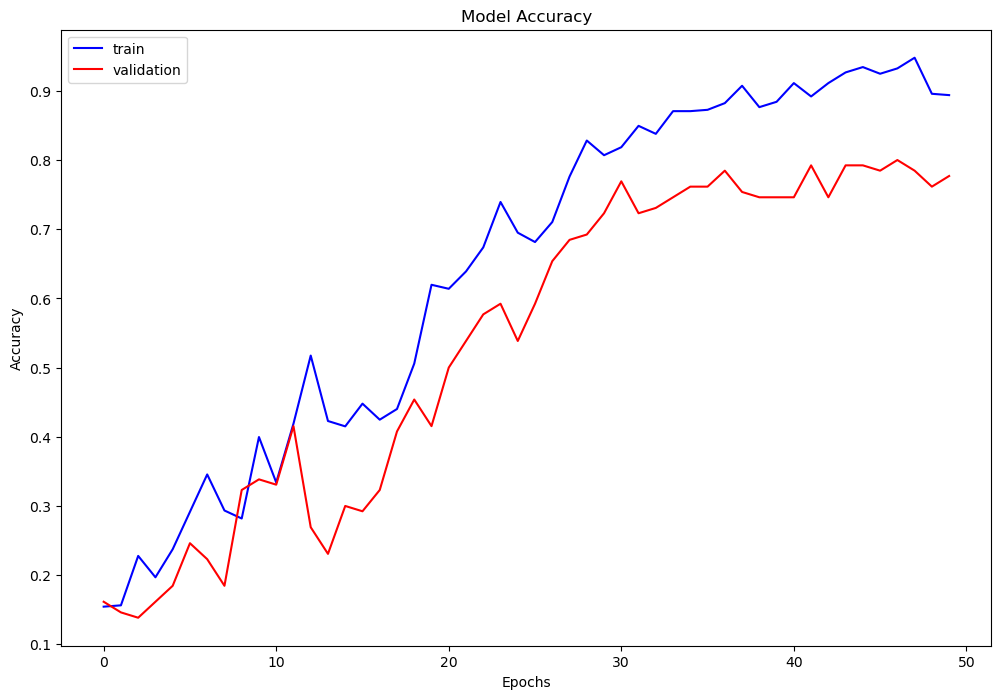

In [18]:
plt.figure(figsize=(12,8))
plt.plot(history.history["accuracy"], color = "b")
plt.plot(history.history["val_accuracy"], color = "r")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"])

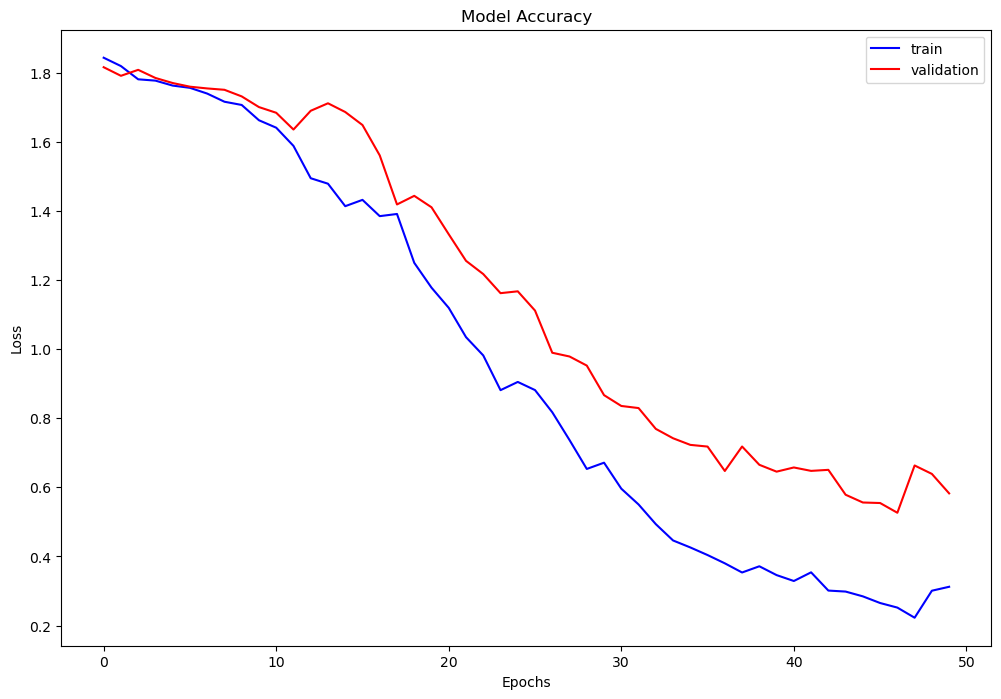

In [19]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], color = "b")
plt.plot(history.history["val_loss"], color = "r")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "validation"])

In [20]:
score = model.evaluate(X_test, y_test)
print("Accuracy: ", score[1]*100)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7559 - loss: 0.7718
Accuracy:  77.91411280632019


In [21]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [22]:
X_test.shape

(163, 224, 224, 3)

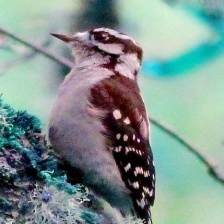

In [23]:
rand_img = np.random.randint(-1,163)
img = array_to_img(X_test[rand_img])
img

In [24]:
labels = lb.classes_
print(labels,"\n")
print("Original", labels[np.argmax(y_test[rand_img])])
print("Predicted", labels[np.argmax(y_pred[rand_img])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO'] 

Original DOWNY WOODPECKER
Predicted DOWNY WOODPECKER


## Dropout

In [25]:
from keras.layers import SpatialDropout2D

In [26]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(SpatialDropout2D(0.33))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(SpatialDropout2D(0.33))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(SpatialDropout2D(0.33))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 224, 224, 8)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 74, 74, 16)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 37, 37, 32)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,038 (1.29 MB)

 Trainable params: 338,038 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = Adam(0.0005),
              metrics=['accuracy'])

In [28]:
epochs = 50
batch_size = 128
history = model.fit(X_train, y_train, 
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.1821 - loss: 1.8159 - val_accuracy: 0.2308 - val_loss: 1.7833
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.2234 - loss: 1.7831 - val_accuracy: 0.3692 - val_loss: 1.7567
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - accuracy: 0.2748 - loss: 1.7369 - val_accuracy: 0.3385 - val_loss: 1.7183
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.2728 - loss: 1.7305 - val_accuracy: 0.3846 - val_loss: 1.6912
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - accuracy: 0.2932 - loss: 1.6818 - val_accuracy: 0.3923 - val_loss: 1.6512
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.3104 - loss: 1.6450 - val_accuracy: 0.4385 - val_loss: 1.6063
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.3329 - loss: 1.6131 - val_accuracy: 0.3462 - val_loss: 1.5730
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - accuracy: 0.3679 - loss: 1.6026 - val_accuracy: 0.3692 - val_loss:

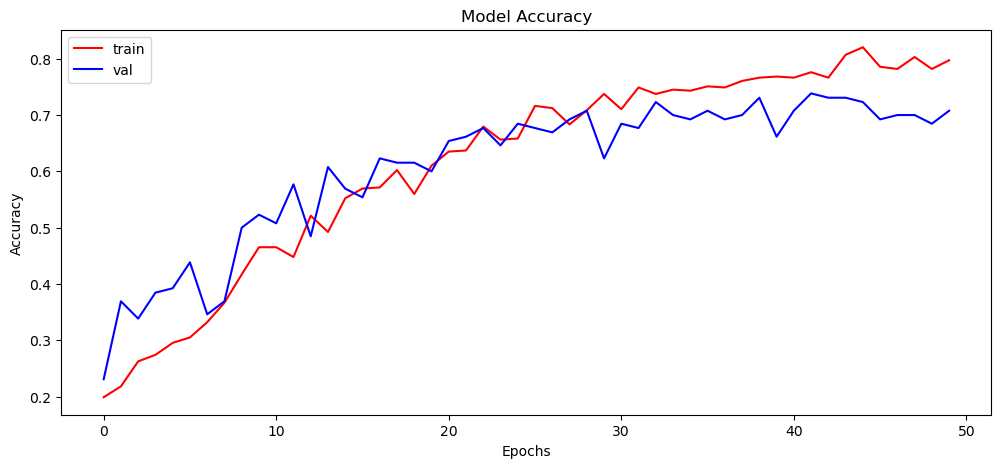

In [29]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [30]:
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7036 - loss: 0.8060
Test Accuracy: 73.61963391304016
